# Evaluating Likelihoods with Simulations

## Requisites

In [2]:
import os
from os.path import join
import tqdm
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tskit as tsk
 
from bgspy.models import BGSModel
from bgspy.genome import Genome
from bgspy.utils import bin_chrom, mean_ratio, rel_error

In [3]:
plt.show()

In [4]:
plt.style.use('./buffalo.mplstyle')
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200

## Load Human Data Data

Load real genomic data for comparison (e.g. to see how sims compare).

In [70]:
#hg_auto = [f'chr{i}' for i in range(1, 23)]
hg_auto = ['chr10']
g = Genome('hg38', seqlens_file="../data/annotation/hg38_seqlens.tsv", chroms=hg_auto)
hg38_gd = GenomeData(g)
hg38_gd.load_counts_dir('../data/h1kg/hg1k_counts/')
hg38_gd.load_neutral_masks('../data/annotation/neutral_phastcons_genes_with_introns.bed.gz')
hg38_gd.load_accessibile_masks('../data/annotation/no_centro.bed')
hg38_gd.load_fasta('../data/annotation/hg38.fa.gz')

In [5]:
hg38_bins = hg38_gd.bin_pairwise_summaries(width=1e6, filter_neutral=True, filter_accessible=True)

  0%|          | 0/22 [00:00<?, ?it/s]

In [6]:
hg38_gd.counts.keys()

dict_keys(['chr21', 'chr11', 'chr14', 'chr13', 'chr20', 'chr22', 'chrX', 'chr12', 'chr15', 'chr19', 'chr4', 'chr5', 'chr18', 'chr9', 'chr3', 'chr6', 'chr1', 'chr8', 'chr7', 'chr2', 'chr10', 'chr17', 'chr16'])

In [7]:
np.unique(hg38_bins.chroms())

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21',
       'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9'],
      dtype='<U5')

In [8]:
np.nanmean(pi_from_pairwise_summaries(hg38_bins.Y()))

0.0010626435749381518

In [9]:
pi_chroms = hg38_gd.pi(filter_neutral=True, filter_accessible=True)

  0%|          | 0/22 [00:00<?, ?it/s]

In [10]:
pi_chroms

({'chr1': 0.0009794325965475543,
  'chr2': 0.0010144525370102391,
  'chr3': 0.0010150483818639209,
  'chr4': 0.0010825690150615748,
  'chr5': 0.0010255618535686066,
  'chr6': 0.001080962034802403,
  'chr7': 0.0010619979174718616,
  'chr8': 0.001191733020919732,
  'chr9': 0.0010954372772814162,
  'chr10': 0.001084846538669501,
  'chr11': 0.0010644808541397611,
  'chr12': 0.0009960857471310192,
  'chr13': 0.0010642238042145944,
  'chr14': 0.0010096775037155676,
  'chr15': 0.0010435935555241677,
  'chr16': 0.00128803403177837,
  'chr17': 0.0010390087968731373,
  'chr18': 0.0011046301610995672,
  'chr19': 0.0012125150454620087,
  'chr20': 0.001054821294691987,
  'chr21': 0.001237281404971918,
  'chr22': 0.0011632624824460974},
 {'chr1': 3513853560859.0,
  'chr2': 3575292319431.0,
  'chr3': 3077797802370.0,
  'chr4': 2553647483475.0,
  'chr5': 2406950878107.0,
  'chr6': 2356239451523.0,
  'chr7': 2615692717753.0,
  'chr8': 2074500297132.0,
  'chr9': 1716032011130.0,
  'chr10': 2107260355740

In [33]:
yri_ave_pi = hg38_gd.gwpi()

In [34]:
yri_ave_pi = hg38_gd.gwpi(filter_neutral=True, filter_accessible=True)
yri_ave_pi

0.001552089897083584

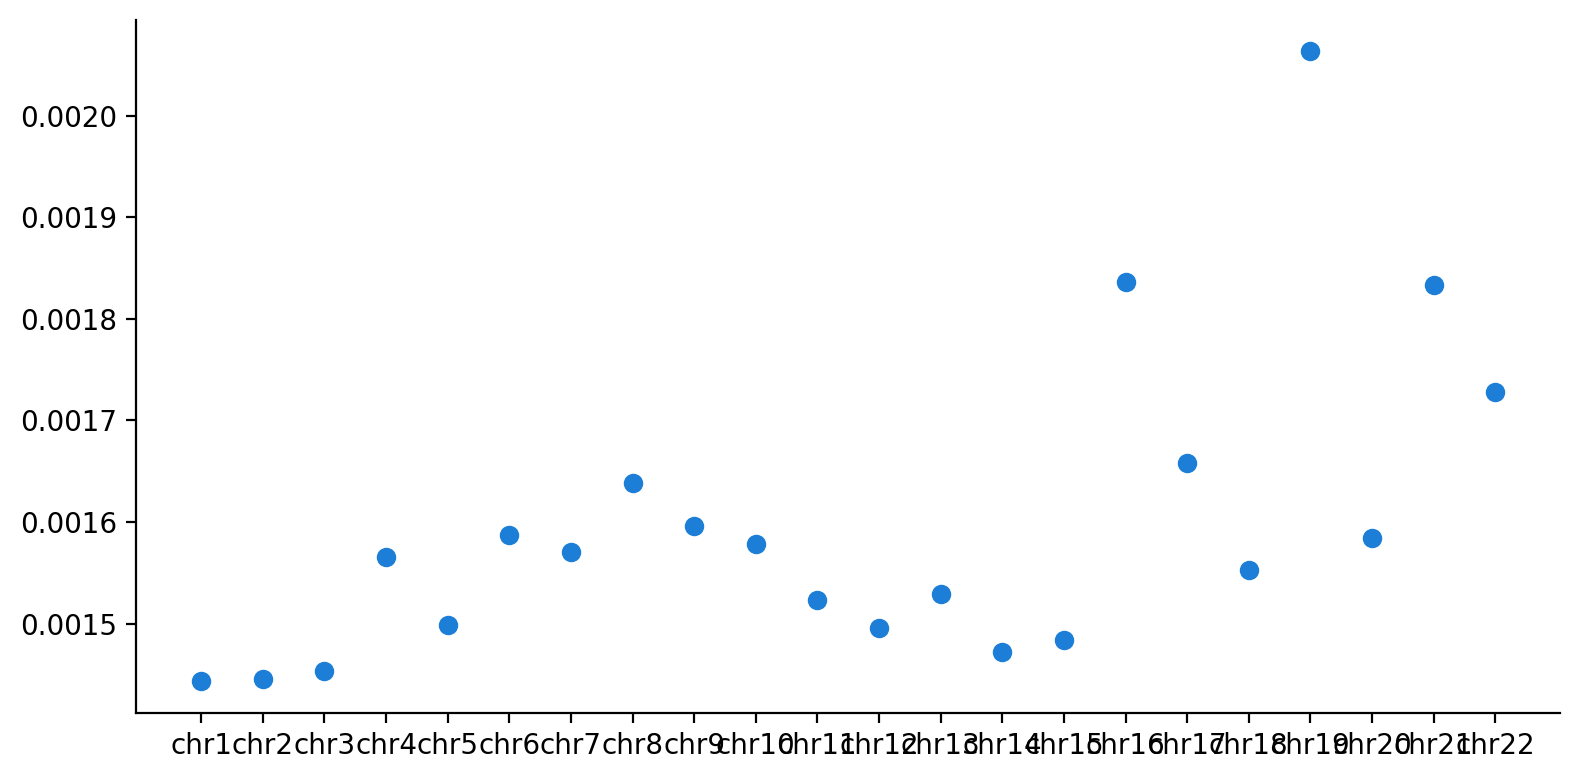

In [46]:
plt.scatter(pi_chroms[0].keys(), pi_chroms[0].values())
plt.tight_layout()

# Likelihood Evaluation

Here we evaluate our likelihood methods with forward simulations.

In [49]:
m = BGSModel.load('../data/bmaps/bgspy/bmap_hg38_6x7grid_10000step_1000N_cds_phastcons_merged.pkl')

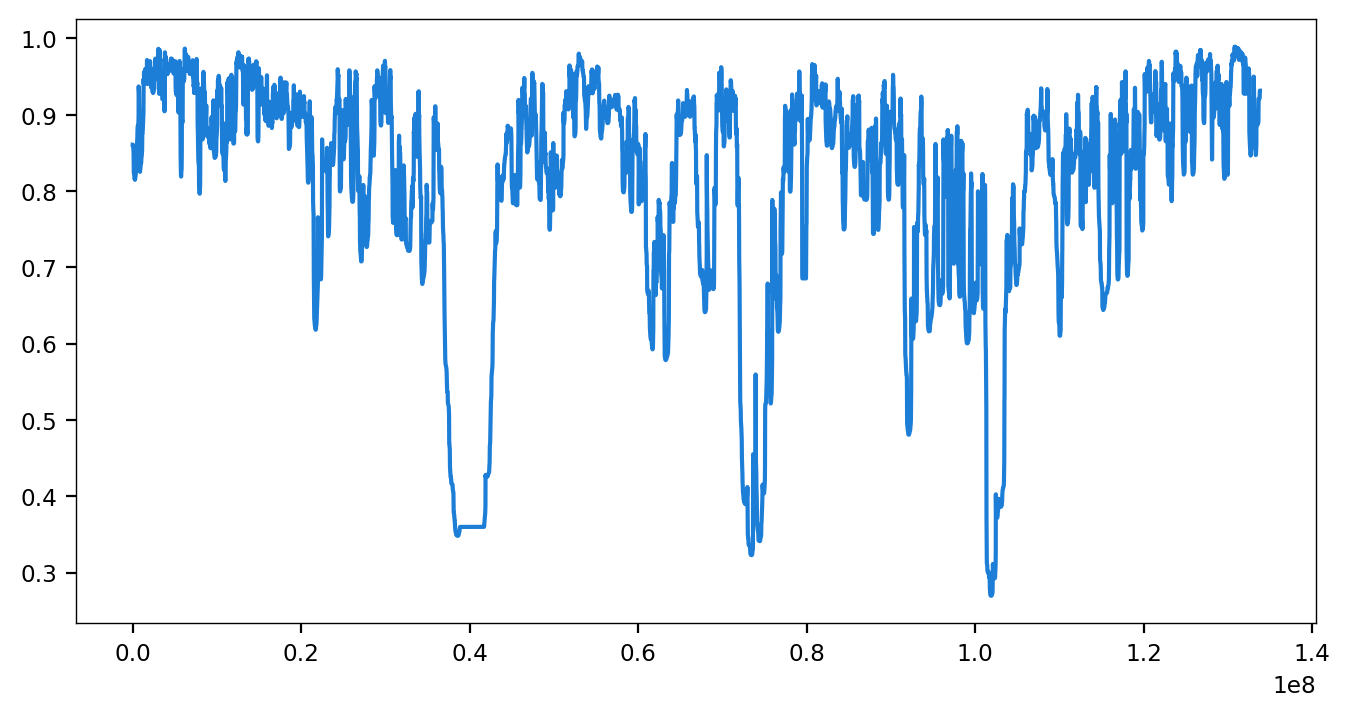

In [67]:
plt.plot(*m.BpScores['chr10', m.w[4], 1e-3])

In [100]:
from bgspy.sim_utils import mutate_simulated_tree

RUN_DIR = '../data/slim_sims/chrombgs_chr10/conserved_cds_phastcons_merged/'
MLE_DIR = join(RUN_DIR, 'mle/')
SIM_DIR = join(RUN_DIR, 'sims/')

file = os.path.join(SIM_DIR, 
    '109/conserved_cds_phastcons_merged_N1000_mu3.16e-09_sh0.01_chr10_seed1094832284_rep192_treeseq.tree')
#file = '../data/slim_sims/chrombgs_features_chr10/conserved_cds_utrs_phastcons_mle/sims/conserved_cds_utrs_phastcons_mle_N10000_mu2e-08_chr10_seed2303429820_rep7_treeseq.tree'

tr = mutate_simulated_tree(tsk.load(file), rate=1e-9)
sgd = GenomeData(g)
sgd.load_counts_from_ts(tr, chrom='chr10')

In [97]:
sgd.pi()

  0%|          | 0/1 [00:00<?, ?it/s]

({'chr10': 3.15823797490645e-05}, {'chr10': 2.6758146425778196e+16})

In [98]:
tr

In [ ]:
tr.metadata

{'SLiM': {'file_version': '0.7',
  'generation': 50000,
  'model_type': 'WF',
  'nucleotide_based': False,
  'separate_sexes': False,
  'spatial_dimensionality': '',
  'spatial_periodicity': '',
  'stage': 'late',
  'user_metadata': {'N': [1000],
   'annot_file': ['../../data/annotation/conserved_cds_phastcons_merged_chr10.bed'],
   'h': [0.5],
   'mu': [3.16e-09],
   'recmap_file': ['../../data/annotation/HapMapII_GRCh37_liftedOverTo_Hg38/genetic_map_Hg38_chr10.txt'],
   'region_length': [133797422],
   's': [0.02],
   'seqlen_file': ['../../data/annotation/hg38_seqlens.tsv'],
   'sh': [0.01]}}}

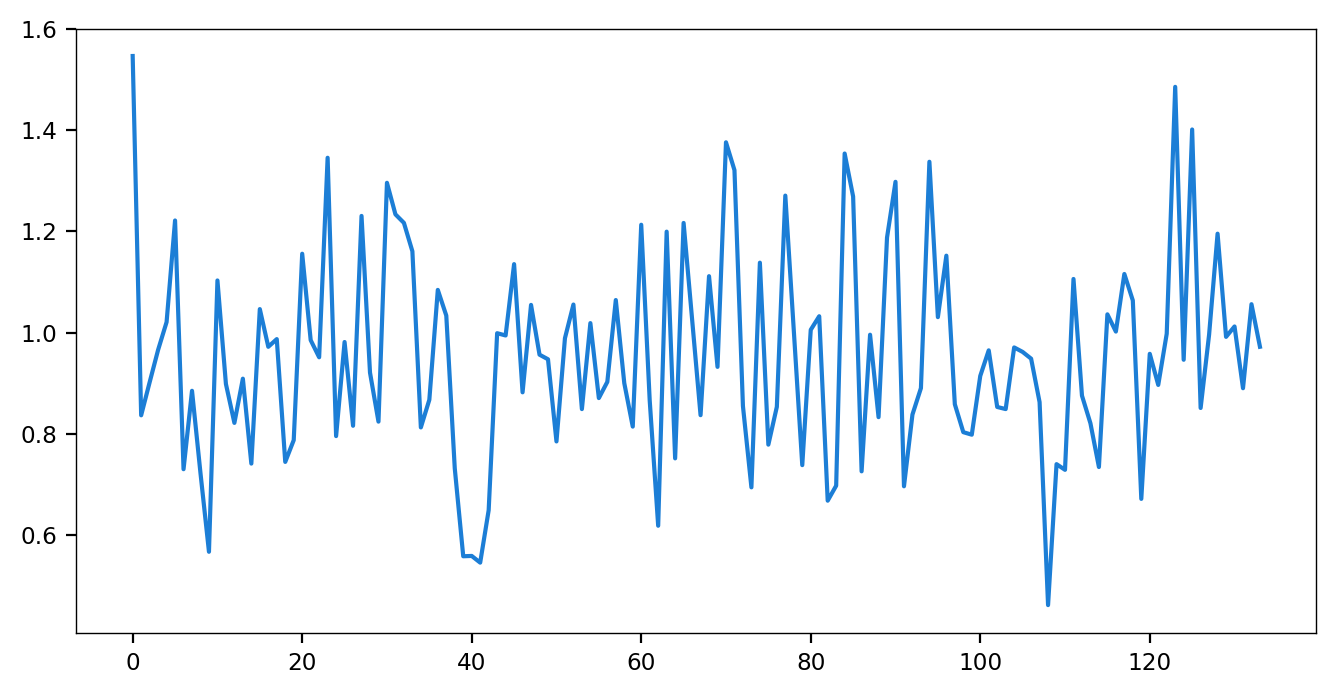

In [101]:
plt.plot(tr.diversity(mode='branch', windows=bin_chrom(tr.sequence_length, 1e6))/4e3)

## Notes on YRI Effective Population Size

An important note on $N_e$. We usually think of human $N_e \approx 10^3$, but this is based on average diversity in all humans post OOA bottleneck, and a mutation rate of $~10^{-8}$. In our dataset we're using just YRI samples, so diversity will be higher. In our data, genome-wide average $\bar{\pi} \approx 1.613 \times 10^{-3}$ (for YRI). Preliminary ML estimates of $\pi_0$ are $1.7 \times 10^{-3}$ to $1.9 \times 10^{-3}$.

There are a variety of demographic parameters from different papers, a good reference for the parameters is [stdpopsim](https://github.com/popsim-consortium/stdpopsim/blob/main/stdpopsim/catalog/HomSap/demographic_models.py).

 - **[Gutenkunst et al. 2009](https://doi.org/10.1371/journal.pgen.1000695)**: $\mu =  2.35 \times 10^{-8}$, $N_\text{YRI} = 12,300$
 - [**Fu et al. 2013**](https://www.nature.com/articles/nature11690): $\mu =  2.36 \times 10^{-8}$, $N_\text{YRI} = 14,474$ 
 - [**Ragsdale and Gravel (2019)**](https://doi.org/10.1371/journal.pgen.1008204): $N_\text{YRI} = 13,900$
 
Finding an estimate of $\bar{\pi}_\text{YRI}$ is surprisingly difficult. [Hernandez et al. (2011)](https://pubmed.ncbi.nlm.nih.gov/21330547/) have in their supplementary materials: $\bar{\pi}_\text{YRI} = 0.0013$, $\bar{\pi}_\text{CEU} = 0.0010$, $\bar{\pi}_\text{CHB+JPT} = 0.0009$ (these are what Leffler et al., 2012 use). These are underestimates though, 

```
"Far from exons, diversity levels on the autosomes are approximately 0.13% 
per base pair in YRI, 0.10% in CEU, and 0.09% in CHB+JPT. As noted above, 
these diversity levels are under-estimates because of the low coverage of 
each individual; moreover, because the coverage differs across population 
samples, the extent to which they are under-estimates will differ slightly 
among the three populations."
```

In [109]:
# what's the relative error between Hernandez and our estimates of YRI π?
rel_error(yri_ave_pi, 0.0013)

24.1040390575496

This seems like it's plausible.

What's the implied $N_e$ then for YRI, for a few $\pi_0$ values and various mutation rates?

In [120]:
mu = np.array([[1.3e-8, 2.35e-8]]).T
np.array([0.0017, 0.0019]) / (4*mu)

array([[32692.30769231, 36538.46153846],
       [18085.10638298, 20212.76595745]])

These are used in the forward simulations.

## Functions

In [5]:
def sim_fit_plot(model, bins, Ys, bscores, mu, sh, loc=None, ratio=True):
    """
    Plot a likelihood fit (model) and the replicate sims (Ys)
    and compare to the correct B values.
    """
    transform = mean_ratio if ratio else lambda x: x
    for i, Y in enumerate(Ys):
        midpoints = [(s+e)/2 for c, s, e in bins.flat]
        lab = 'sim' if i == 0 else None
        plt.plot(midpoints, transform(pi_from_pairwise_summaries(Y)), label=lab, c='k', alpha=0.2)


    for i in range(10):
        plt.plot(midpoints, transform(model.predict(optim=i)), c='0.44', alpha=0.1)
    
    plt.plot(midpoints, transform(model.predict()), c='r', label='prediction')

    if ratio:
        x, y = bscores.pairs('chr10', mu, sh)
        plt.plot(x, transform(y), label='B', c='purple')

    plt.ylabel("$\pi/\\bar{\pi}$")
    plt.xlabel("position")
    plt.title(f"$\mu = {mu}, sh = {sh}, R^2 = {model.R2():.a2}$")
    plt.legend(loc=loc, ncol=2)


In [6]:
#g.load_annot("../data/annotation/conserved_phastcons_thresh0.bed.gz")
#g.load_recmap("../data/annotation/hapmap_genetic_map.txt")

In [7]:
# The B file for the conservation track used in the simulation
pkl_b_file= '../data/bmaps/bgspy/bmap_hg38_sims_10000step_chr10.pkl'
m = BGSModel.load(pkl_b_file)

In [8]:
m

## Explore one Simulation Tree File

In [9]:
## neutral control
file = '../data/slim_sims/chrombgs_features_chr10/neutral/sims/neutral_N1000_mu2e-08_chr10_seed2906012675_rep0_treeseq.tree'
#file = '../data/test_trees/N10k/chrombgs_chr10_thresh0_N10k_N10000_mu1e-09_sh0.01_chr10_seed1818839066_rep37_treeseq.tree'
tree = tsk.load(file)
        
# load simulation data into GenomeData object
gd = GenomeData(g)
gd.load_neutral_masks('../data/annotation/neutral_phastcons_genes_with_introns.bed.gz')
gd.load_accessibile_masks('../data/annotation/no_centro.bed')

# mutate the tree sequence -- currently things are not recapitated(!)
gd.load_counts_from_ts(mutate_simulated_tree(tree, rate=1e-7), chrom='chr10')

In [10]:
gd.pi()

({'chr10': 0.0004023535314388913}, {'chr10': 133797422})

In [14]:
tree.diversity(mode='branch')/4000

1.0097012539739139

In [20]:
0.0004023535314388913, 4*1000*1e-7

(0.0004023535314388913, 0.00039999999999999996)

In [28]:
1e-8 * 40000 * 4

0.0016

In [116]:
file = '../data/slim_sims/chrombgs_features_chr10/conserved_cds_utrs_phastcons_mle/sims/conserved_cds_utrs_phastcons_mle_N10000_mu2e-08_chr10_seed2303429820_rep7_treeseq.tree'
#file = '../data/test_trees/N10k/chrombgs_chr10_thresh0_N10k_N10000_mu1e-09_sh0.01_chr10_seed1818839066_rep37_treeseq.tree'
tree = tsk.load(file)
        
# load simulation data into GenomeData object
gd = GenomeData(g)
gd.load_neutral_masks('../data/annotation/neutral_phastcons_genes_with_introns.bed.gz')
gd.load_accessibile_masks('../data/annotation/no_centro.bed')

# mutate the tree sequence -- currently things are not recapitated(!)
gd.load_counts_from_ts(mutate_simulated_tree(tree, rate=1e-8), chrom='chr10')

In [155]:
# how many variants?
np.all(gd.counts['chr10'] > 0, axis=1).sum()

45148

How close are mutation and branch diversity?

In [156]:
gd

GenomeData (1 chromosomes)
Masks:
chrom      acc    neut    both
-------  -----  ------  ------
chr10      0.9    0.63    0.56
chromosome ends trimmed? False 

In [157]:
gd.accesssible_masks

{'chr10': array([ True,  True,  True, ...,  True,  True,  True])}

In [158]:
gd.counts['chr10'].shape

(133797422, 2)

In [159]:
tree.sequence_length, g.seqlens['chr10']

(133797422.0, 133797422)

In [161]:
pi_bins = gd.bin_pairwise_summaries(width=1e6)#, filter_accessible=True, filter_neutral=True)
xx, yy = pi_bins.pi_pairs('chr10')
plt.plot(xx, yy)

  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

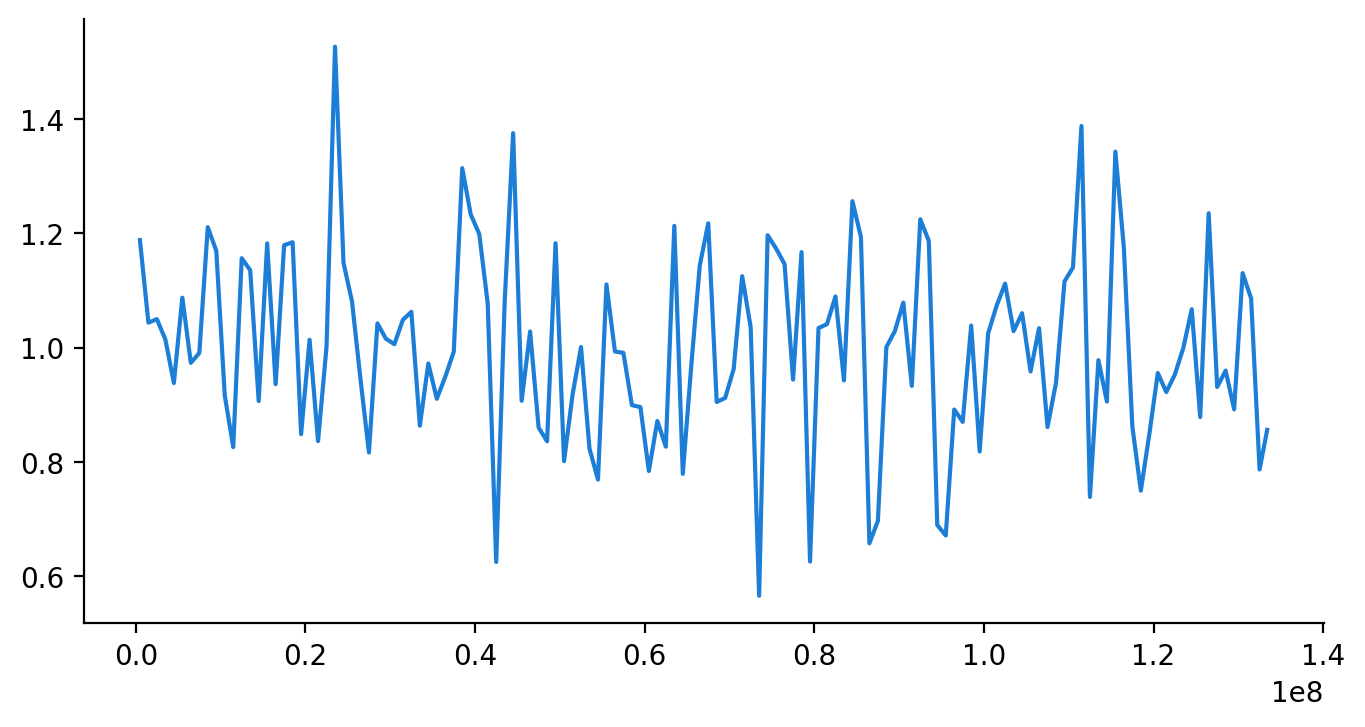

In [160]:
mb_bins = bin_chrom(tree.sequence_length, 1e6)
mb_mps = (mb_bins[1:] + mb_bins[:-1])/2
plt.plot(mb_mps, mean_ratio(tree.diversity(windows=mb_bins, mode='branch')))

pi_bins = gd.bin_pairwise_summaries(width=1e6)#, filter_accessible=True, filter_neutral=True)
xx, yy = pi_bins.pi_pairs('chr10')
plt.plot(xx, mean_ratio(yy))

In [32]:
# how many variants?
np.all(hg38_gd.counts['chr10'] > 0, axis=1).sum()

1402597

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

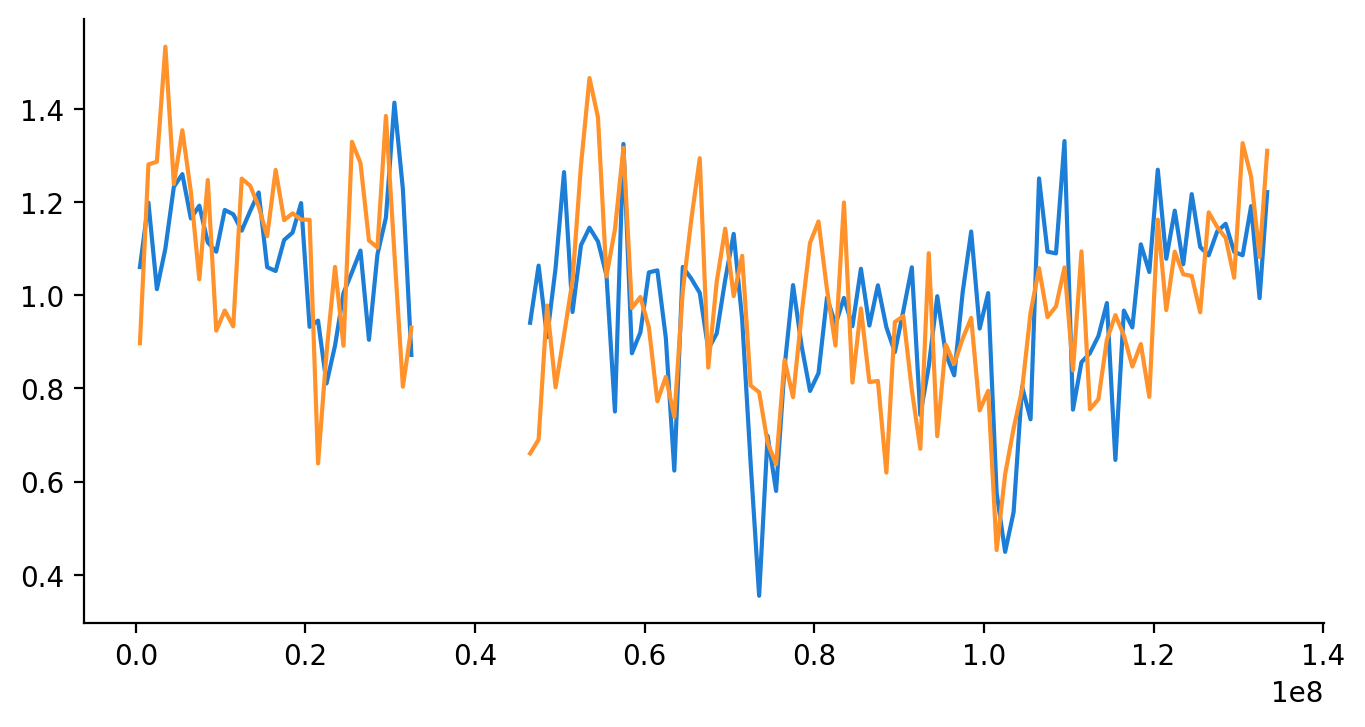

In [134]:
pi_bins = gd.bin_pairwise_summaries(width=1e6)
xx, yy = pi_bins.pi_pairs('chr10')
plt.plot(xx, mean_ratio(yy))

hg_pi_bins = hg38_gd.bin_pairwise_summaries(width=1e6)

xx, yy = hg_pi_bins.pi_pairs('chr10')
plt.plot(xx, mean_ratio(yy))

In [142]:
pi_bins = gd.bin_pairwise_summaries(width=1e6)
xx, yy = pi_bins.pi_pairs('chr10')

  0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
hg38_gd.pi()

NameError: name 'hg38_gd' is not defined

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

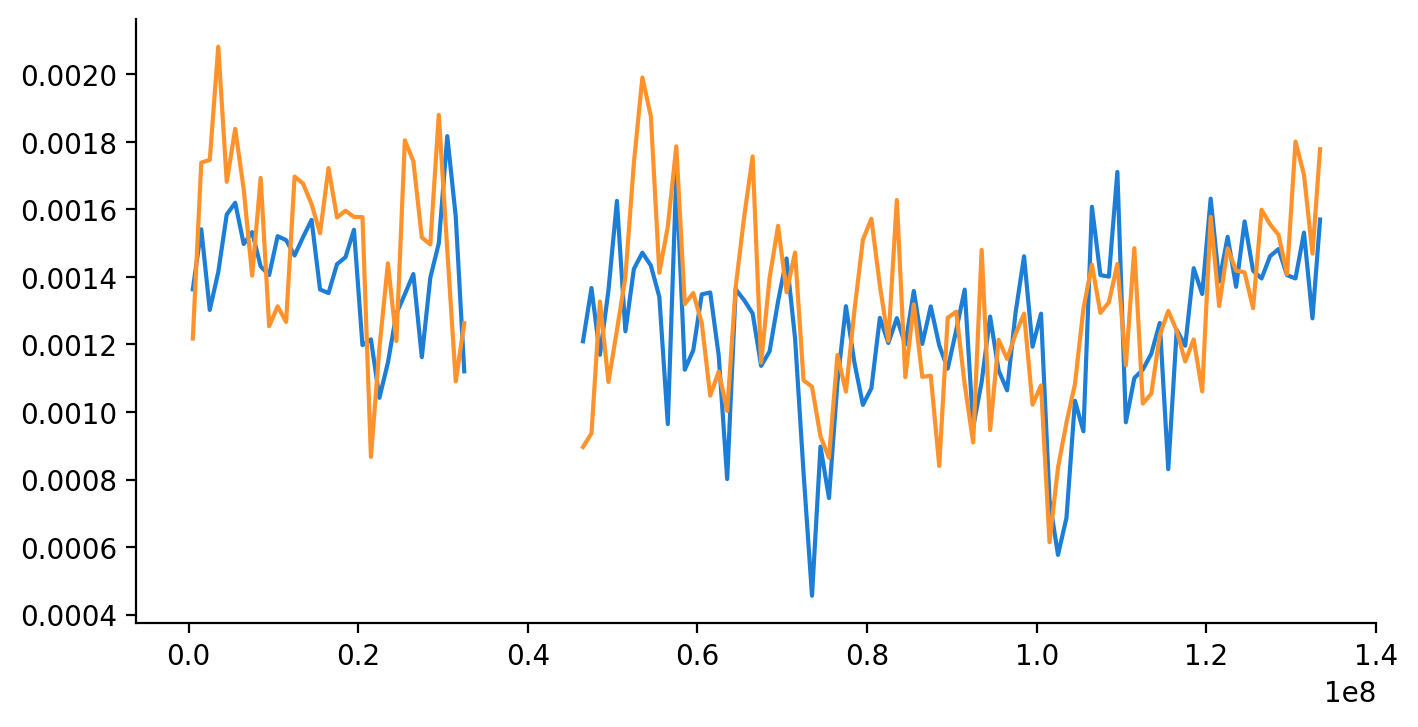

In [153]:
pi_bins = gd.bin_pairwise_summaries(width=1e6)
xx, yy = pi_bins.pi_pairs('chr10')
plt.plot(xx, 4*yy)

hg_pi_bins = hg38_gd.bin_pairwise_summaries(width=1e6)

xx, yy = hg_pi_bins.pi_pairs('chr10')
plt.plot(xx, yy)

## Test Model Fits

In [133]:
#regul_pkl = '../data/bmaps/bgspy/bmap_hg38_6x6grid_10000step_10000N_cds_utrs_regulatory_phastcons.pkl'
#regul_m = BGSModel.load(regul_pkl)

annot_pkl = '../data/bmaps/bgspy/bmap_hg38_6x6grid_10000step_10000N_cds_utrs_phastcons.pkl'
annot_m = BGSModel.load(annot_pkl)


In [124]:
sim_bins = gd.bin_pairwise_summaries(width=1e6)

  0%|          | 0/1 [00:00<?, ?it/s]

In [135]:
#regul_b = sim_bins.bin_Bs(regul_m.BScores)
#regul_bp = sim_bins.bin_Bs(regul_m.BpScores)

annot_b = sim_bins.bin_Bs(annot_m.BScores)
annot_bp = sim_bins.bin_Bs(annot_m.BpScores)

In [149]:
fmlik_nml = FreeMutationModel(w=annot_m.w, t=annot_m.t, logB=annot_bp[sim_bins.chrom_indices('chr10'), ...],
                              bins=sim_bins, Y=sim_bins.Y(filter_masked=True))
fmlik_nml.fit(starts=500, ncores=70)

  0%|          | 0/500 [00:00<?, ?it/s]

In [150]:
fmlik_nml.features = annot_m.features

In [151]:
fmlik_nml

MLE (interpolated w): 6 x 6 x 3
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Free-mutation model ML estimates:
negative log-likelihood: 43365394361033.875
π0 = 0.0004031484276933267
R² = 76.1219
W = 
          cds    phastcons    utr
------  -----  -----------  -----
1e-06   0.607        0.591  0.992
1e-05   0.304        0.004  0.004
0.0001  0.059        0.001  0
0.001   0.029        0.099  0.003
0.01    0            0.246  0
0.1     0.001        0.06   0.001
μ = 
        cds    phastcons          utr
-----------  -----------  -----------
1.29759e-07  5.26241e-08  9.11275e-08

In [139]:
fmlik_nml

MLE (interpolated w): 6 x 6 x 3
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Free-mutation model ML estimates:
negative log-likelihood: 43365379499817.56
π0 = 0.00040438648028031705
R² = 76.1174
W = 
          cds    phastcons    utr
------  -----  -----------  -----
1e-06   0.867        0.692  0.952
1e-05   0.009        0.001  0.018
0.0001  0.093        0      0.001
0.001   0.026        0.07   0.003
0.01    0.001        0.198  0.001
0.1     0.004        0.039  0.025
μ = 
        cds    phastcons          utr
-----------  -----------  -----------
1.12894e-07  7.04391e-08  2.31265e-08

In [106]:
fmlik_nml

MLE (interpolated w): 6 x 5 x 3
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Free-mutation model ML estimates:
negative log-likelihood: 449370376003.7976
π0 = 0.00044744536982243053
R² = 52.6928
W = 
            1      3      4
------  -----  -----  -----
1e-05   0.017  0.31   0.982
0.0001  0      0.009  0.009
0.001   0.001  0      0.002
0.01    0.118  0.002  0.001
0.1     0.863  0.678  0.006
μ = 
          1           3            4
-----------  ----------  -----------
8.29326e-08  7.2765e-08  2.43366e-08

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot: xlabel='predicted $\\hat{\\pi}$', ylabel='residuals'>)

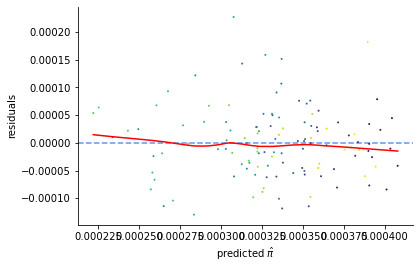

In [107]:
fmlik_nml.resid_fitted_plot()

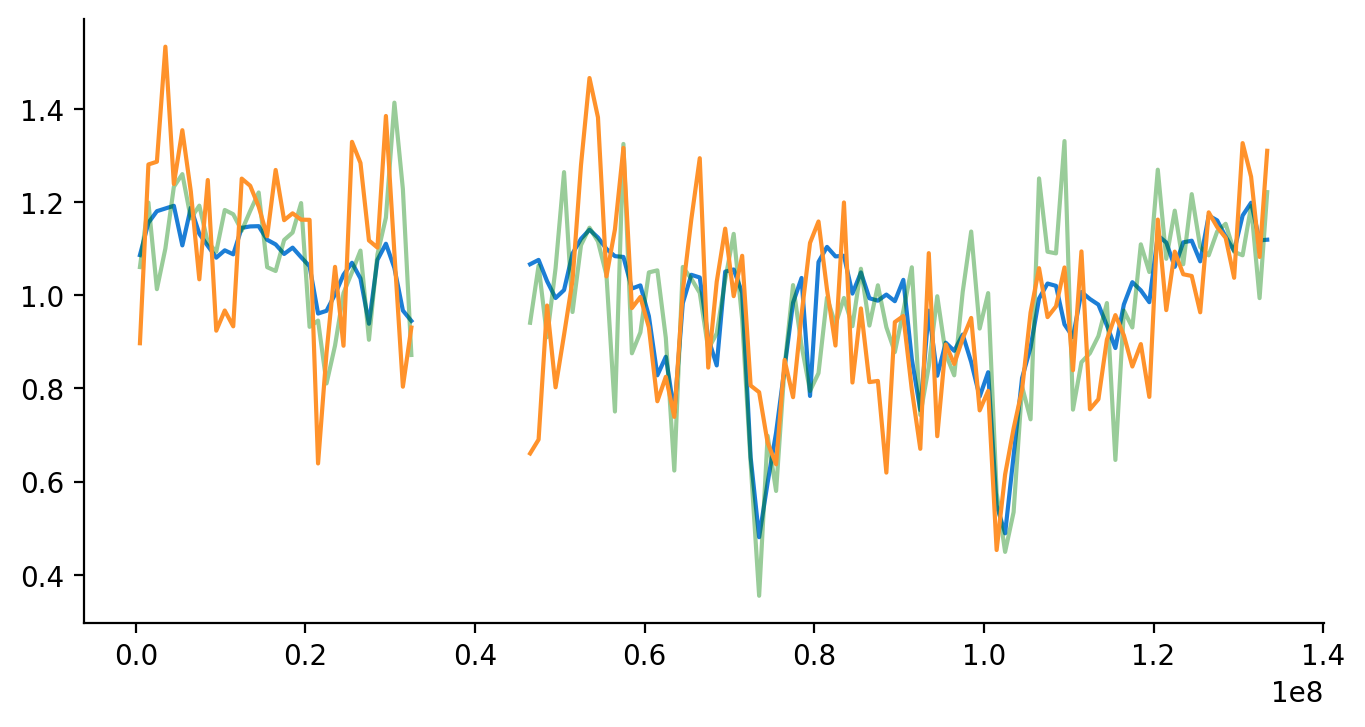

In [148]:
fmlik_nml.predict_plot('chr10', ratio=True)
plt.plot(*hg38_bins.pi_pairs('chr10', ratio=True))
#plt.plot(bins.midpoints()['chr10'], mean_ratio(np.exp(Bp[:, 5, 4])), c='r')
#plt.plot(bins.midpoints()['chr10'], mean_ratio(np.exp(Bp[:, 4, 4])), c='purple')

In [117]:
fmlik_nml

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.00e-10 3.16e-10 1.00e-09 3.16e-09 1.00e-08 3.16e-08] (before interpolation)
  t grid: [0.0001   0.000316 0.001    0.00316  0.01     0.0316   0.1     ]

Free-mutation model ML estimates:
negative log-likelihood: 247615847518.0098
π0 = 0.0003052398878050735
W = 
--------  -----
0.0001    0.002
0.000316  0.002
0.001     0.002
0.00316   0.206
0.01      0.005
0.0316    0.301
0.1       0.482
--------  -----
μ = 
-----------
6.55067e-08
-----------

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial


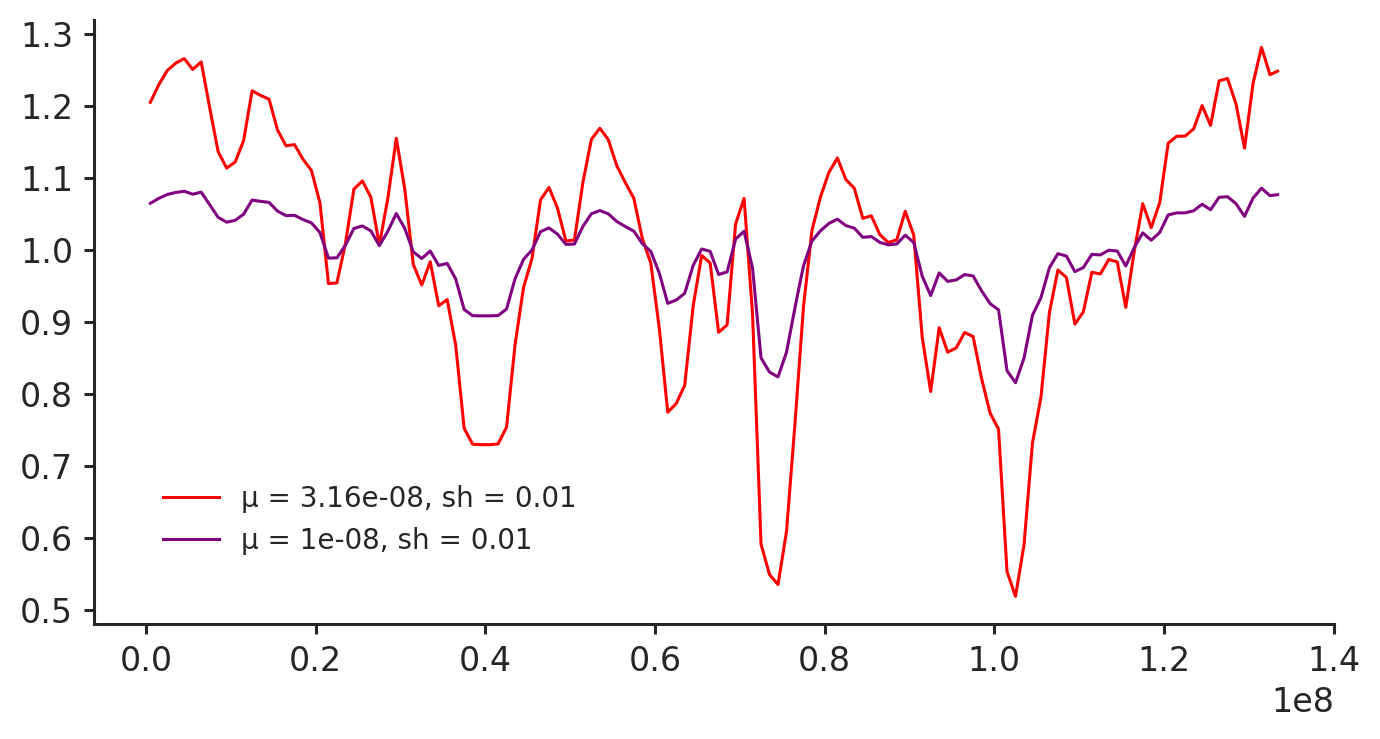

In [92]:
a = (5, 4)
plt.plot(bins.midpoints()['chr10'], mean_ratio(np.exp(Bp[:, 5, 4])), c='r', label=f"μ = {m.w[a[0]]}, sh = {m.t[a[1]]}")
b = (4, 4)
plt.plot(bins.midpoints()['chr10'], mean_ratio(np.exp(Bp[:, 4, 4])), c='purple',  label=f"μ = {m.w[b[0]]}, sh = {m.t[b[1]]}")
plt.legend()

In [105]:
slik_nml = SimplexModel(w=m.w, t=m.t, logB=Bp2, bins=bins2, Y=Ys2[0])
slik_nml.fit(starts=70, ncores=70, algo='ISRES')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [01:39<00:00,  1.42s/it]


In [106]:
slik_nml

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.00e-10 3.16e-10 1.00e-09 3.16e-09 1.00e-08 3.16e-08] (before interpolation)
  t grid: [0.0001   0.000316 0.001    0.00316  0.01     0.0316   0.1     ]

Simplex model ML estimates:
negative log-likelihood: 247729388547.78876
π0 = 0.00023650494639369758
μ = 3.159999977979877e-08
W = 
--------  -----
0.0001    0
0.000316  0
0.001     0
0.00316   0.541
0.01      0.238
0.0316    0.221
0.1       0
--------  -----

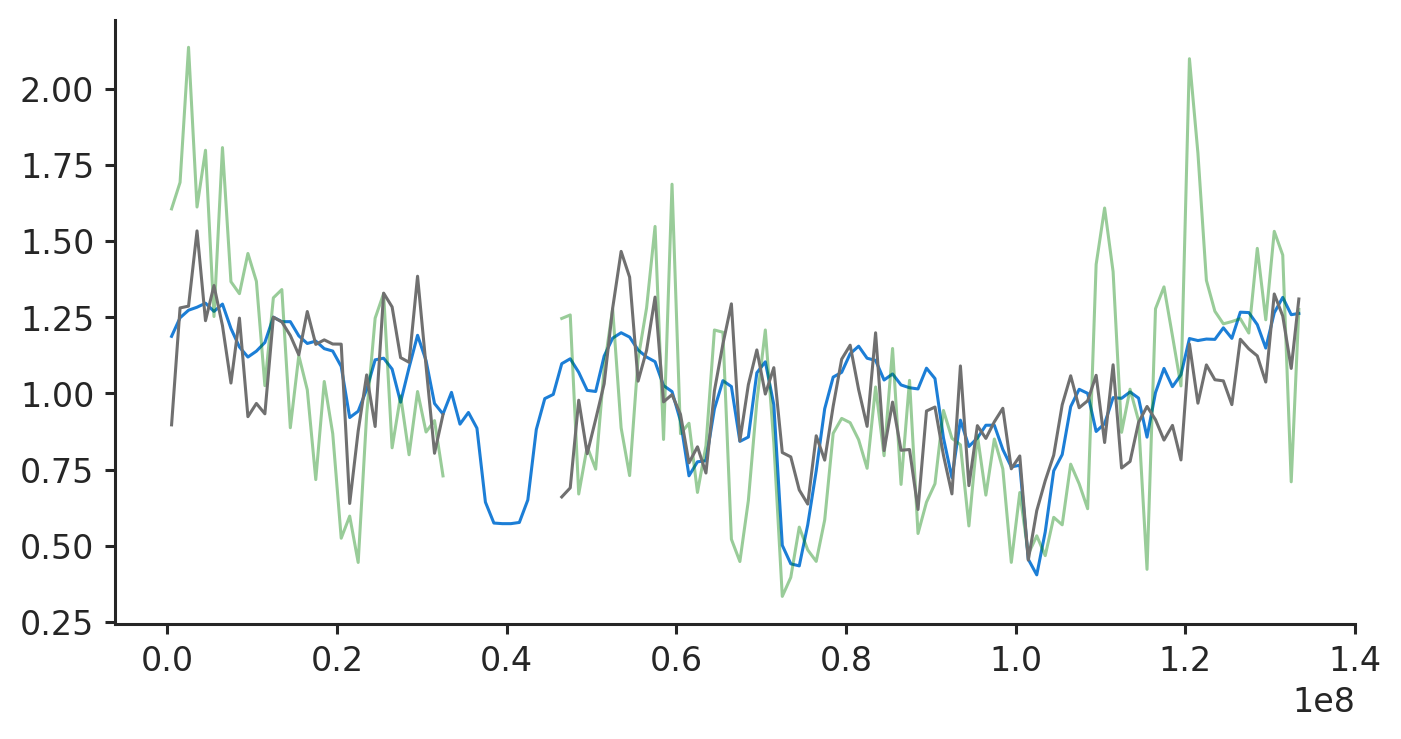

In [109]:
slik_nml.predict_plot('chr10', ratio=True)
plt.plot(*hg38_bins.pi_pairs('chr10', ratio=True), c='0.44')

In [137]:
np.var(pi_from_pairwise_summaries(Ys[0])), 2/9 * (1e-7 * 1000 * 4)**2

(5.433647453226744e-09, 3.555555555555555e-08)

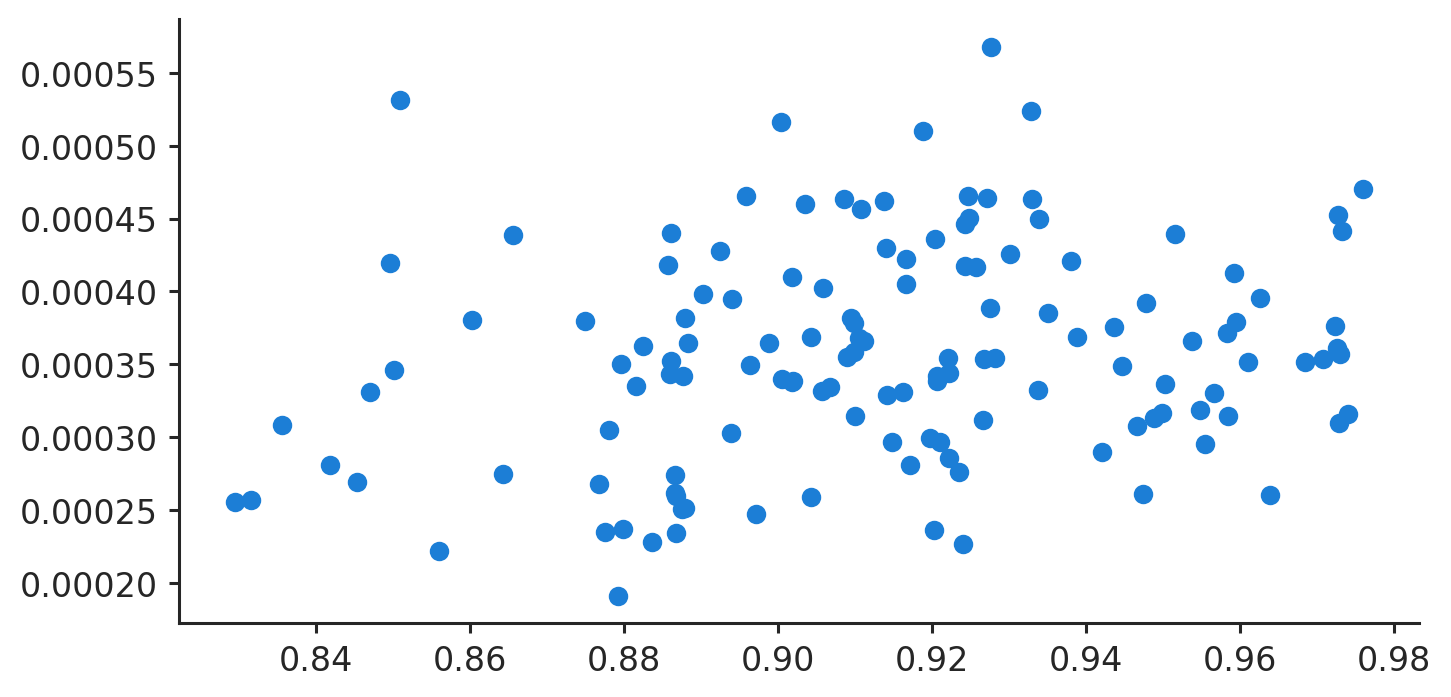

In [135]:
plt.scatter(np.exp(Bp[:, 4, 5, 0]), pi_from_pairwise_summaries(Ys[0]))

In [113]:
flik_nml = FixedMutationModel(w=m.w, t=m.t, logB=Bp2, bins=bins2, Y=Ys2[0])
flik_nml.fit(mu=3e-8, starts=100, ncores=70, algo='ISRES')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:50<00:00,  1.10s/it]


In [114]:
flik_nml

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.00e-10 3.16e-10 1.00e-09 3.16e-09 1.00e-08 3.16e-08] (before interpolation)
  t grid: [0.0001   0.000316 0.001    0.00316  0.01     0.0316   0.1     ]

Fixed-Mutation Simplex model ML estimates:
negative log-likelihood: 247740121023.78152
π0 = 0.00023352390650931157
μ = 3e-08 (fixed)
W = 
--------  -----
0.0001    0
0.000316  0
0.001     0
0.00316   0.489
0.01      0.511
0.0316    0
0.1       0
--------  -----

In [ ]:
real_theta = np.array([2e-4, 0, 0, 0, 0, 1, 0, 0])
real_theta.size == m.t.size + 2

In [ ]:
m.BpScores

In [ ]:
model

In [24]:
flik_nml = FixedMutationModel(m.w, m.t, Bp, Y=Ys[0])
flik_nml.fit(mu=1e-8, starts=70, ncores=70, algo='ISRES')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [03:08<00:00,  2.69s/it]


In [29]:
flik_nml

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.00e-10 3.16e-10 1.00e-09 3.16e-09 1.00e-08 3.16e-08] (before interpolation)
  t grid: [0.0001   0.000316 0.001    0.00316  0.01     0.0316   0.1     ]

Fixed-Mutation Simplex model ML estimates:
negative log-likelihood: 851145270400.9254
π0 = 0.0003879326378457048
μ = 1e-08 (fixed)
W = 
--------  -----
0.0001    0
0.000316  0.589
0.001     0.411
0.00316   0
0.01      0
0.0316    0
0.1       0
--------  -----

In [75]:
flik_nml.mle_W.reshape(m.t.size, 1)

array([[8.88576583e-10],
       [5.88995930e-01],
       [4.11004056e-01],
       [1.74845711e-11],
       [3.73387376e-09],
       [5.73324922e-09],
       [3.07051538e-09]])

In [127]:


sim_fit_plot(flik_nml, bins, Ys, ratio=False)
#plt.plot(midpoints, model.predict(theta=np.array([4e-4, 0, 0, 0, 0, 1, 0, 0])), c='k', label='real θ')
#plt.plot(midpoints, model.predict(theta=np.array([4e-4, 0, 0.589, 0.411, 0, 0, 0, 0])), c='green', label='predicted B')


TypeError: sim_fit_plot() missing 3 required positional arguments: 'bscores', 'mu', and 'sh'

This seems to show a serious oddity in the simulations: there is a great deal more variance in any one replicate than we possibly see in real data.

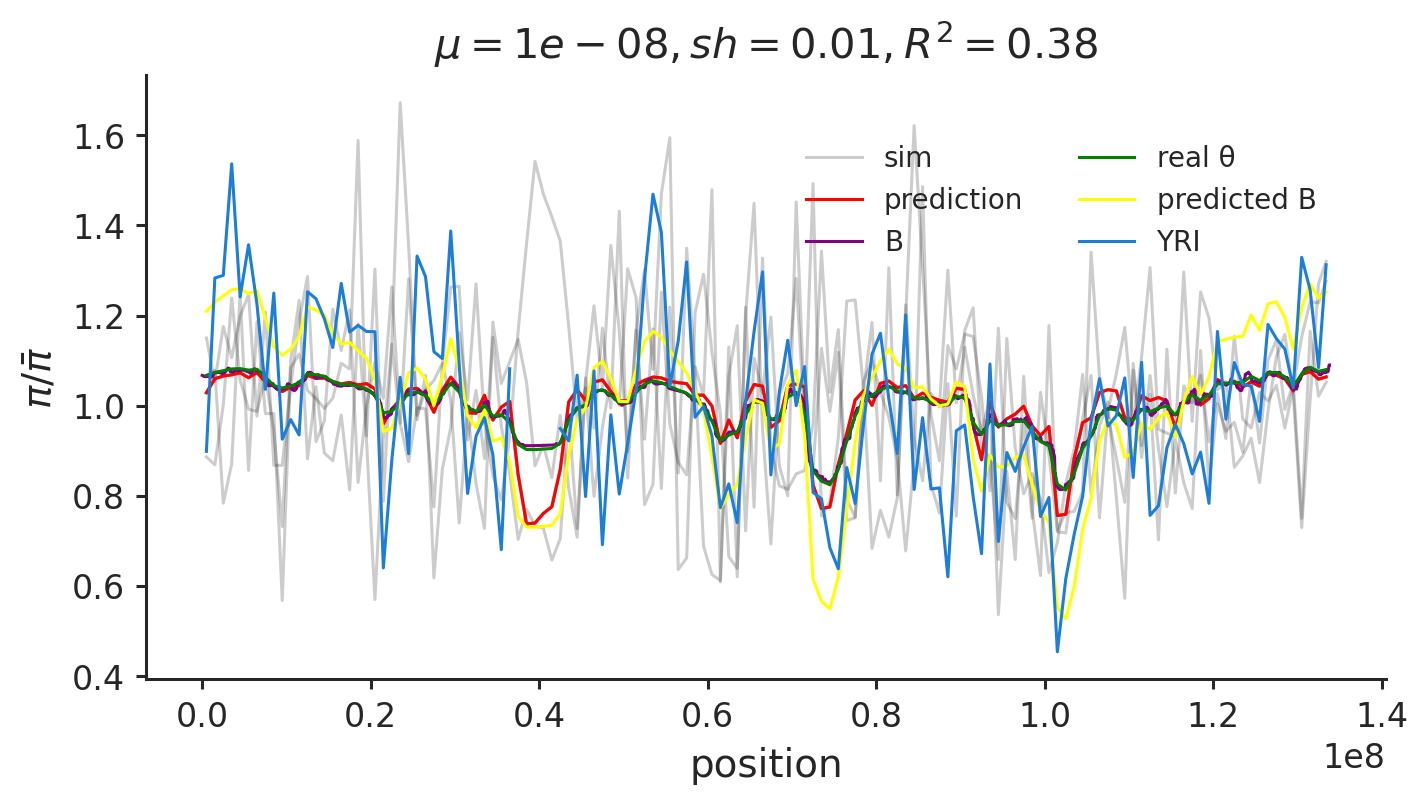

In [122]:

sim_fit_plot(flik_nml, bins, Ys, m.BpScores, 1e-8, 1e-2)

plt.plot(midpoints, mean_ratio(model.predict(theta=np.array([4e-4, 0, 0, 0, 0, 1, 0, 0]))), c='green', label='real θ')
#plt.plot(midpoints, mean_ratio(model.predict(theta=np.array([4e-4, 0, 0.589, 0.411, 0, 0, 0, 0]))), c='green', label='predicted B')
plt.plot(midpoints, mean_ratio(model.predict(theta=np.array([4e-4, 0, 0, 0, 0, 1, 0, 0]), mu=3.16e-8)), c='yellow', label='predicted B')

#plt.plot((midpoints, ratio(predict_simplex(np.array([2e-4, 1e-8, 0, 0, 0, 0, 1, 0, 0]), Bp, m.w))))

xx, yy = hg38_pi['chr10'].pairs
plt.plot(xx, mean_ratio(yy), label='YRI')
plt.legend(ncol=2)

In [119]:
flik_nml.optim.thetas_.mean(axis=0)

array([0.00088572, 0.08762073, 0.38788438, 0.38401795, 0.05250799,
       0.02877958, 0.02860545, 0.03058393])

In [ ]:
fmlik_nml = FreeMutationModel(m.w, m.t, Bp, Y=Ys[0])
fmlik_nml.fit(starts=100, ncores=70, algo='NELDERMEAD')

In [ ]:
fmlik_nml

In [ ]:

model = fmlik_nml


for Y in Ys:
    midpoints = [(s+e)/2 for c, s, e in bins.flat]
    plt.plot(midpoints, pi_from_pairwise_summaries(Y), label='sim')


for i in range(10):
    plt.plot(midpoints, model.predict(optim=i), c='0.44', alpha=0.1)
    
plt.plot(midpoints, model.predict(), c='r', label='prediction')

x, y = m.BpScores.pairs('chr10', 1e-8, 1e-3)
plt.plot(x, 4e-4*y, label='B', c='purple')


plt.plot(midpoints, model.predict(theta=np.array([4.5e-4, 0, 0, 0, 0, 1, 0, 0])), c='k', label='real θ')
#plt.plot((midpoints, ratio(predict_simplex(np.array([2e-4, 1e-8, 0, 0, 0, 0, 1, 0, 0]), Bp, m.w))))

plt.ylabel("$\pi/\\bar{\pi}$")
plt.xlabel("position")
plt.title(f"$R^2 = {model.R2():.2}$")
plt.legend(loc='lower left', ncol=2)

In [ ]:
fmlik_nml2 = FreeMutationModel(m.w, m.t, Bp, Y=Ys[2])
fmlik_nml2.fit(starts=100, ncores=70, algo='NELDERMEAD')

In [ ]:
midpoints = [(s+e)/2 for c, s, e in bins.flat]
plt.plot(midpoints, pi_from_pairwise_summaries(Ys[2]))
plt.plot(midpoints, fmlik_nml2.predict(), c='r', label='prediction')


In [ ]:
from bgspy.likelihood import predict_simplex

plt.plot(midpoints, pi_from_pairwise_summaries(trim_Y), label='sim')

plt.plot(midpoints, predict_simplex(np.array([2.4e-4, 1e-8, 0, 0, 0, 1, 0, 0, 0]), Bp, m.w))

In [ ]:
slik_nml

In [ ]:
W = lik_nml.optim.thetas_[:100].mean(axis=0)[1:].reshape((5, 3))
W

In [ ]:
lik_nml.R2()

In [ ]:
lik_nml

In [ ]:
plt.scatter(pi_from_pairwise_summaries(trim_Y), lik_nml.predict())
plt.axline((0, 0), slope=1, c='r')

## Load a few Tree Files

In [ ]:

def load_sim_genomic_data(files, cons_track, access_mask, rate, chrom, winsize, bgs_model):
    sims_gds = []
    Ys = []
    bins = []
    for file in tqdm.tqdm(files):
        tree = tsk.load(os.path.join(tree_dir, file))
        
        # load simulation data into GenomeData object
        gd = GenomeData(g)
        gd.load_neutral_masks(cons_track)
        gd.load_accessibile_masks(access_mask)
        
        # mutate the tree sequence -- currently things are not recapitated(!)
        gd.load_counts_from_ts(mutate_simulated_tree(tree, rate=rate), chrom=chrom)
        sims_gds.append(gd)
        
        # calc Ys
        bgs_bins = gd.bin_pairwise_summaries(winsize, progress=False)
        bins.append(bgs_bins)
        Y = bgs_bins.Y()
        Ys.append(Y)
        
    # note assumes same bins -- TODO verify?
    bins = bins[0]
    B = bins.bin_Bs(bgs_model.BScores)
    Bp = bins.bin_Bs(bgs_model.BpScores)
    return sims_gds, bins, Ys, B, Bp

tree_dir = '../data/test_trees/mu1e-08_sh0.01/'
files = os.listdir(tree_dir)

sim_gds, bins, Ys, B, Bp = load_sim_genomic_data(files, 
                                            cons_track='../data/annotation/neutral_phastcons_genes_with_introns.bed.gz', 
                                            access_mask='../data/annotation/no_centro.bed', rate=1e-7, chrom='chr10',
                                            winsize=1e6, bgs_model=m)

  0%|                                                                                                                                                                                                                                                     | 0/3 [00:10<?, ?it/s]


KeyboardInterrupt: 

In [93]:
tree_dir = '../data/test_trees/merged/'
files = os.listdir(tree_dir)
sim_gds2, bins2, Ys2, B2, Bp2 = load_sim_genomic_data(files, 
                                            cons_track='../data/annotation/neutral_phastcons_genes_with_introns.bed.gz', 
                                            access_mask='../data/annotation/no_centro.bed', rate=1e-7, chrom='chr10',
                                            winsize=1e6, bgs_model=m)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:23<00:00, 27.69s/it]


In [59]:
files

['chrombgs_chr10_thresh0_N1000_mu1e-08_sh0.01_chr10_seed4013305247_rep58_treeseq.tree',
 'chrombgs_chr10_thresh0_N1000_mu1e-08_sh0.01_chr10_seed3411287642_rep66_treeseq.tree',
 'chrombgs_chr10_thresh0_N1000_mu1e-08_sh0.01_chr10_seed3308834955_rep22_treeseq.tree']

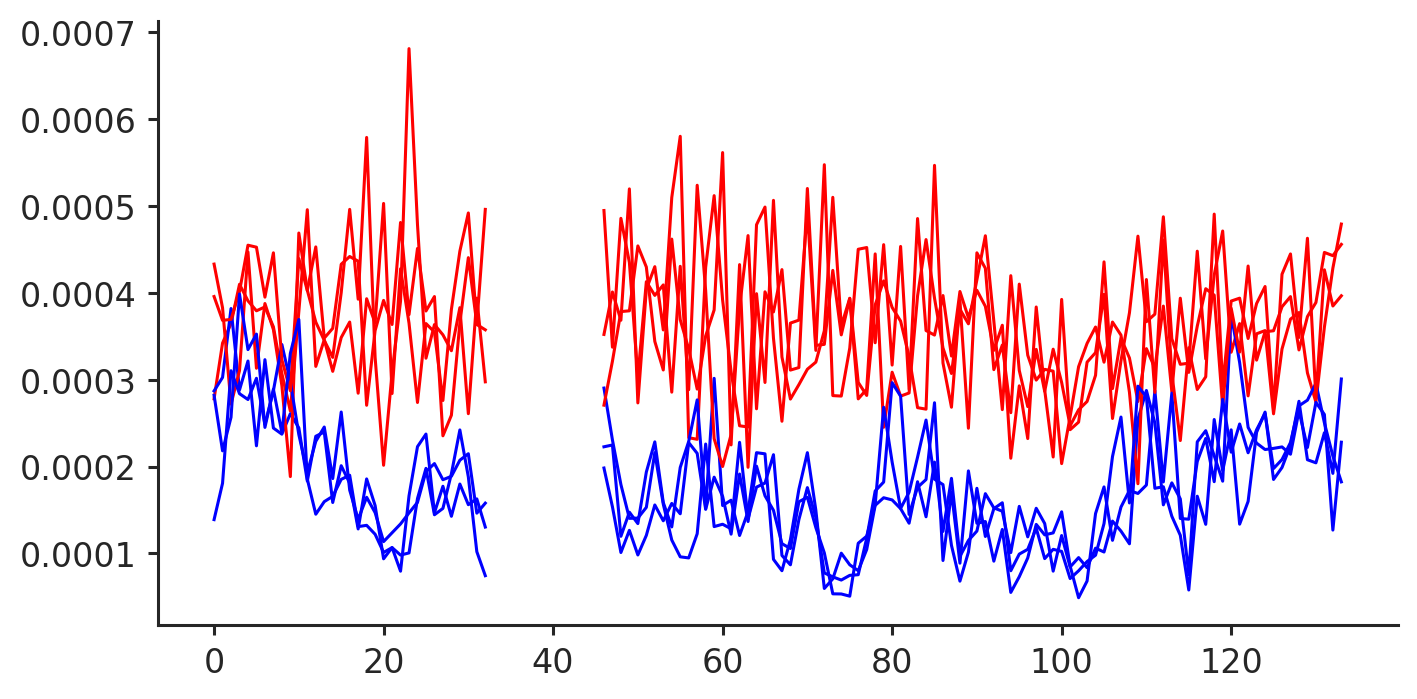

In [94]:
for i in range(3):
    plt.plot(pi_from_pairwise_summaries(Ys[i]), c='r')
    plt.plot(pi_from_pairwise_summaries(Ys2[i]), c='b')